* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2023 </i></pre>
* * *


<h1 align="center"> Lab 6: Model complexity </h1>

<pre align="left"> October 5th 2023               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Understand the concept of model complexity
- Perform model selection and cross validation
- Get familiar with different models for classification and regression

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/hichamjanati/hichamjanati.github.io/master/_data/Motorcycledata.txt"
names = ["x", "y"]
df_raw = pd.read_csv(url, index_col=0, delim_whitespace=True, names=names)
print(df_raw.shape)
df_raw.head()

(133, 2)


,x,y
1,2.4,0.0
2,2.6,-1.3
3,3.2,-2.7
4,3.6,0.0
5,4.0,-2.7


During a series of simulated collisions of motorcycles, the acceleration of the motorcycle helmet was measured after at several time points slightly before and after the impact. This data depicts the acceleration (y) as a function of time (x). The goal here is to find the best model that can most accurately predict y. 

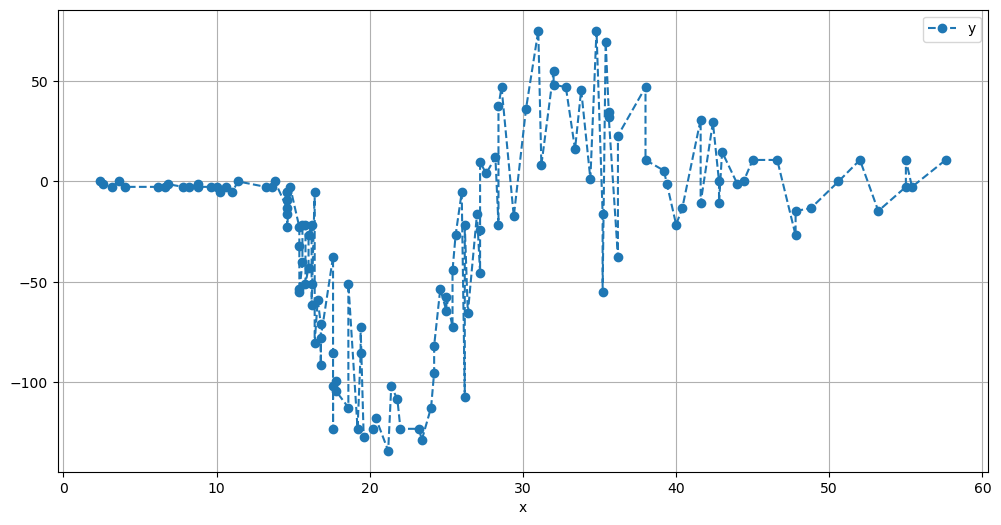

In [11]:
ax = df_raw.plot("x", "y", marker="o", ls="--", figsize=(12, 6))
ax.grid()

In [14]:
#X,y = df_raw.value.T
X, y = df_raw["x"], df_raw["y"]

print("X:\n", X, "\n\n y:\n", y)

X:
 1       2.4
2       2.6
3       3.2
4       3.6
5       4.0
       ... 
129    53.2
130    55.0
131    55.0
132    55.4
133    57.6
Name: x, Length: 133, dtype: float64 

 y:
 1       0.0
2      -1.3
3      -2.7
4       0.0
5      -2.7
       ... 
129   -14.7
130    -2.7
131    10.7
132    -2.7
133    10.7
Name: y, Length: 133, dtype: float64


#### Question 1
Fit a linear model on the data using numpy only

In [15]:
n=len(X)
corr_xy=(X-X.mean()).dot(y-y.mean())/n
var_x=(X-X.mean()).dot(X-X.mean())/n
alpha=corr_xy/var_x

beta=y.mean()-alpha*X.mean()

alpha,beta

(1.0906752829686472, -53.00792020755944)

#### Question 2
Visualize the obtained model displayed on top of the data

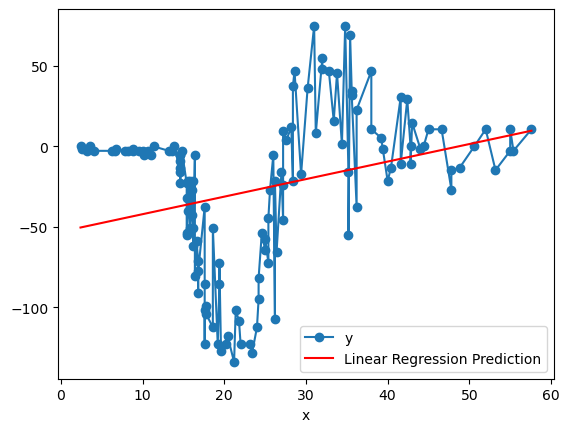

In [21]:
grid=np.linspace(X.min(), X.max(), 2)
grid_prediction=alpha*grid+beta

ax= df_raw.plot("x", "y", marker="o")
#ax.grid()
#ax.plot(grid, grid_prediction, color)

ax.plot(grid, grid_prediction, color='red', label='Linear Regression Prediction')
plt.legend()
plt.show()

In [22]:
from sklearn, linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X.reshape())

SyntaxError: invalid syntax (292378168.py, line 1)

In [20]:
X[:, None]
X.reshape(len(X),1)
X.reshape(-1,1)

/var/folders/v6/f0h5x5pn34334gw7rdyy1k2r0000gn/T/ipykernel_753/1157030093.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X[:, None]


AttributeError: 'Series' object has no attribute 'reshape'

#### Question 3
Polynomial regression (fitting a best polynomial on the data) can be done using `np.polyfit` to obtain the coefficients and `polyval` to evaluate it.

Perform a polynomial regression on the data and compute the accuracy on the entire data for different degrees.

In [23]:
np.polyfit(X, y, deg=4)

array([-1.43050427e-05, -5.35533894e-03,  6.04955320e-01, -1.62415601e+01,
        7.52062230e+01])

#### Question 4
Visualize the fitted curves for degrees 1, 3, 10 on the same plot. Try higher degree polynomial fits. Are higher degrees always better ?

To evaluate the best polynomial fit using cross-validation, we write our own scikit-learn and use scikit-learn's GridSearchCV to perform cross-validation. 

#### Question 5
Fill the class below and find the best Polynomial fit:


In [4]:
from sklearn.base import RegressorMixin, BaseEstimator
from sklearn.model_selection import GridSearchCV, LeaveOneOut

class PolynomialFit(BaseEstimator, RegressorMixin):
    def __init__(self, degree=5):
        # todo
    
    def fit(self, x, y):
        # to do 
        return self

    def predict(self, x):
        # to do 
        return y


#### Question 6
Perfom a LeaveOneOut cross-validation on the polynomial degree. What is the best degree ?

#### Question 7
See the content of the attribute `cv_results_` of the gridsearch object and plot the mean CV score as a function of the degree. 